# Зачетный проект на тему: "Анализ рынка автомобилей в России в 2020 году"

## Цели работы: 

Проанализировать информацию о проданных автомобилях:
1. Сравнить цены на различные модели автомобилей. 
2. Оценить возможные факторы, влияющие на изменение цен.
3. Выявить общие предпочтения покупателей
4. Составить рейтинг лучших автомобилей в каждой ценовой категории.

## Описание выбранного датасета

Датасет взят с сайта [kaggle](https://www.kaggle.com/datasets/beaver68/cars-dataset-in-russia). Он содержит информацию о марке, коробке передач, приводе, количестве сидений, количестве дверей,  стране, виде топлива, объеме двигателя, цвете, пробеге, цене, годе выпуска, типе кузова, поколении, модели, приводе, типе наддува, расположении цилиндров, виде передних тормозов, точном объеме двигателя, ширине, типе передней подвески, диаметре цилиндра и ходе поршня, максимальной мощности, длине, классе автомобиля, колесной базе, количестве цилиндров, высоте, расходе топлива, крутящем момент, количестве клапанов на цилиндр, объеме топливного бака, ширине задней колеи, ширине передней колеи, снаряженной массе, клиренсе, расположении двигателя, максимальной скорости,  размере колеса, коробке передач, разгоне до 100, полном вес, компрессионном соотношении,  расходе, мощности двигателя, рестайлинге, начальной серии выпуска, конечной серии, объеме багажника, расходе в городе, расходе на трассе и среднем расходе.

## Ход работы:

Рассмотрим выбранный датасет. Файл `data/cars_dataset.csv` содержит более 22 тыс записей с 54 различными параметрами автомобилей, купленных в России в 2020 году. Некоторые из них, например дата выпуска линейки и т.п. бесполезны для нашей задачи. Выберем из всех параметров только самые необходимые, вроде цены, пробега, расхода и т.п. Также, опираясь на статью ["Авто в каком возрасте можно считать старым?"](https://dzen.ru/a/YceBSoMdwEkdRg12) на [Яндекс Дзене](https://dzen.ru) исключим автомобили старше 20 лет.

In [128]:
import pandas as pd

CP_DF = pd.DataFrame(pd.read_csv('data/cars_dataset.csv')).filter(items=['Brand', 'Model', 'Gearbox', 'Drive unit', 'Country', 'Fuel type', 'Engine volume', 'Color', 'Mileage', 'Price', 'Year', 'Body type', 'Maximum speed', 'Consumption', 'Trunk volume min', 'Trunk volume max'])
CP_DF = CP_DF[CP_DF['Year'] >= 2000]
CP_DF.index += 1
CP_DF


,Brand,Model,Gearbox,Drive unit,Country,Fuel type,Engine volume,Color,Mileage,Price,Year,Body type,Maximum speed,Consumption,Trunk volume min,Trunk volume max
1,Mercedes-Benz,G-Class,automatic,full,German,diesel,2.9,black,0.0,12902800.0,2020.0,SUV,199.0,9.8,1941.0,667.0
2,Mercedes-Benz,G-Class,automatic,full,German,diesel,2.9,green,0.0,15709500.0,2020.0,SUV,210.0,9.6,1941.0,667.0
3,Mercedes-Benz,G-Class,automatic,full,German,petrol,4.0,black,15500.0,13890000.0,2019.0,SUV,210.0,12.1,1941.0,667.0
4,Mercedes-Benz,G-Class,automatic,full,German,petrol,4.0,black,0.0,13116000.0,2020.0,SUV,210.0,12.1,1941.0,667.0
5,Mercedes-Benz,G-Class,automatic,full,German,petrol,4.0,gray,15297.0,11450000.0,2019.0,SUV,210.0,12.1,1941.0,667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22668,Chrysler,Sebring,automatic,front,USA,petrol,2.4,silver,180000.0,300000.0,2008.0,Sedan,200.0,8.9,0.0,441.0
22669,Chrysler,Sebring,automatic,front,USA,petrol,2.7,gray,141000.0,330000.0,2008.0,Sedan,207.0,10.7,0.0,441.0
22670,Chrysler,Sebring,automatic,front,USA,petrol,2.4,black,222000.0,654000.0,2007.0,Sedan,200.0,8.9,0.0,441.0
22671,Chrysler,Sebring,automatic,front,USA,petrol,2.7,black,165000.0,500000.0,2008.0,Sedan,207.0,10.7,0.0,441.0


Рассмотрим средние цены на автомобили различных марок, чтобы в дальнейшем разделить их по стоимости на условные категории. Для этого, для начала, определим, какие вообще марки автомобилей содержатся в выбранном датасете.

In [129]:
uniquie_cars = []
for brand in CP_DF['Brand']:
    if brand not in uniquie_cars:
        uniquie_cars.append(brand)
uniquie_cars = sorted(uniquie_cars)
print(f'Всего уникальных марок: {len(uniquie_cars)},\n{uniquie_cars}')

Всего уникальных марок: 81,
['AC', 'Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Cadillac', 'Changan', 'Cherry', 'Chevrolet', 'Chrysler', 'Citroen', 'DW Hower', 'Daewoo', 'Daihatsu', 'Daimler', 'Datsun', 'Dodge', 'DongFeng', 'FAW', 'Ferrari', 'Fiat', 'Ford', 'GAZ', 'GMC', 'Geely', 'Genesis', 'Great Wall', 'Haval', 'Hawtai', 'Honda', 'Hummer', 'Hyundai', 'IZH', 'Infiniti', 'Iran Khodro', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'LADA', 'Lamborghini', 'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'Luxgen', 'MINI', 'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mitsubishi', 'Moskvich', 'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Ravon', 'Renault', 'Rolls-Royce', 'Rover', 'SEAT', 'Saab', 'Scion', 'Skoda', 'Smart', 'SsangYong', 'Subaru', 'Suzuki', 'TagAZ', 'Tesla', 'Toyota', 'UAZ', 'Volkswagen', 'Volvo', 'Vortex', 'ZAZ', 'ZX']


Создадим датафрейм `AVG_DF`, отражающий информацию о средней стоимости и среднем возрасте автомобилей каждой марки.

In [130]:
AVG_DF = pd.DataFrame()
for brand in sorted(uniquie_cars):
    temp = CP_DF[CP_DF['Brand'] == brand].filter(items=['Price', 'Year'], axis=1).mean().round(1)
    temp['Sales'] = len(CP_DF[CP_DF['Brand'] == brand])
    AVG_DF[brand] = temp

AVG_DF

,AC,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Cadillac,Changan,Cherry,...,Suzuki,TagAZ,Tesla,Toyota,UAZ,Volkswagen,Volvo,Vortex,ZAZ,ZX
Price,6950000.0,1328659.1,762116.6,12797500.0,1718248.8,2569589.2,6602549.3,1440425.2,863425.8,254002.5,...,613300.2,327538.5,4557000.0,1448493.8,629669.8,1127093.0,1384587.5,219200.0,136200.0,230000.0
Year,2004.0,2010.0,2007.2,2017.5,2011.7,2012.7,2012.1,2010.6,2017.1,2010.8,...,2008.5,2009.5,2016.8,2010.2,2013.9,2011.1,2011.7,2010.2,2010.2,2007.0
Sales,2.0,47.0,20.0,8.0,827.0,1417.0,71.0,143.0,31.0,157.0,...,364.0,39.0,24.0,966.0,106.0,934.0,395.0,30.0,15.0,4.0


Для наглядности построим график, отражающий среднюю цену каждой марки автомобилей.

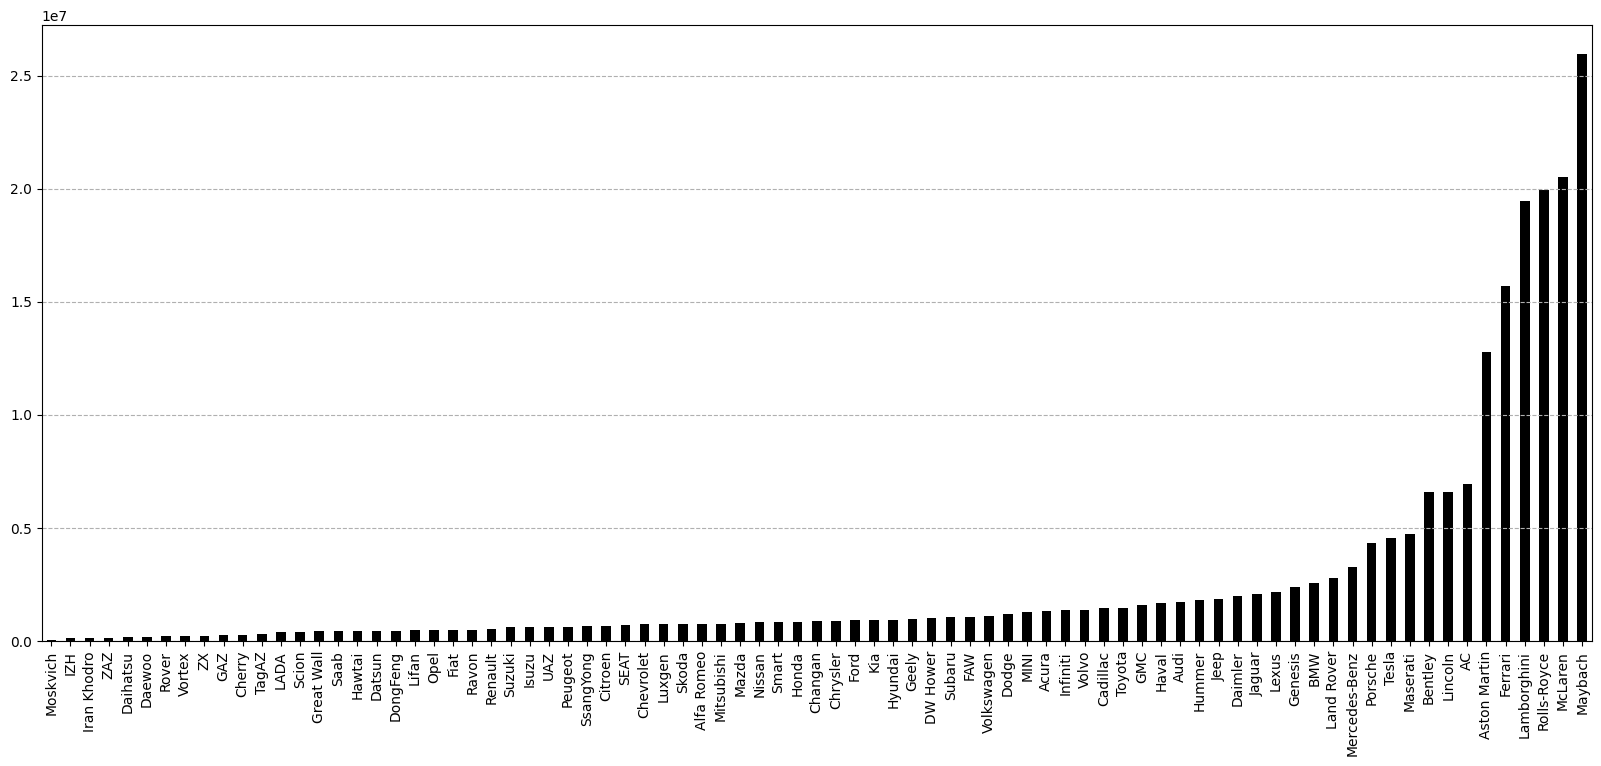

In [131]:
import matplotlib.pyplot as plt

AVG_DF.loc['Price'].sort_values().plot(kind='bar', color='black', figsize=(20, 8))
plt.grid(True, axis='y', linestyle='--')
plt.show()


По данному графику сложно судить о стоимости большинства автомобилей. Исчключим из списка марки автомобилей, средняя цена которых превышает 10 млн рублей, а также марки автомобилей, не пользующиеся спросом, т.е. продажи которых составили менее 50 экземпляров. Запишем резульат в датафрейм `AVG_UPD_DF`.

In [132]:
AVG_UPD_DF = pd.DataFrame()
for brand in AVG_DF:
    if len(CP_DF[CP_DF['Brand'] == brand]) >= 50 and AVG_DF[brand].loc['Price'] <= 10000000:
        temp = CP_DF[CP_DF['Brand'] == brand].filter(items=['Price', 'Year'], axis=1).mean().round(1)
        temp['Sales'] = len(CP_DF[CP_DF['Brand'] == brand])
        AVG_UPD_DF[brand] = temp

AVG_UPD_DF

,Audi,BMW,Bentley,Cadillac,Cherry,Chevrolet,Chrysler,Citroen,Daewoo,Dodge,...,Saab,Skoda,Smart,SsangYong,Subaru,Suzuki,Toyota,UAZ,Volkswagen,Volvo
Price,1718248.8,2569589.2,6602549.3,1440425.2,254002.5,735305.2,897366.1,651720.6,180328.6,1184892.1,...,438767.1,756786.0,833603.8,645216.8,1053108.1,613300.2,1448493.8,629669.8,1127093.0,1384587.5
Year,2011.7,2012.7,2012.1,2010.6,2010.8,2010.4,2006.7,2011.3,2008.5,2008.9,...,2005.4,2012.4,2012.8,2010.6,2009.8,2008.5,2010.2,2013.9,2011.1,2011.7
Sales,827.0,1417.0,71.0,143.0,157.0,623.0,106.0,454.0,70.0,195.0,...,73.0,470.0,53.0,162.0,385.0,364.0,966.0,106.0,934.0,395.0


Таким образом, в целях увеличения объективности, были исключены автомобили из категорий особо дорогих и не пользующихся спросом. Построим аналогичный график на основе полученных данных

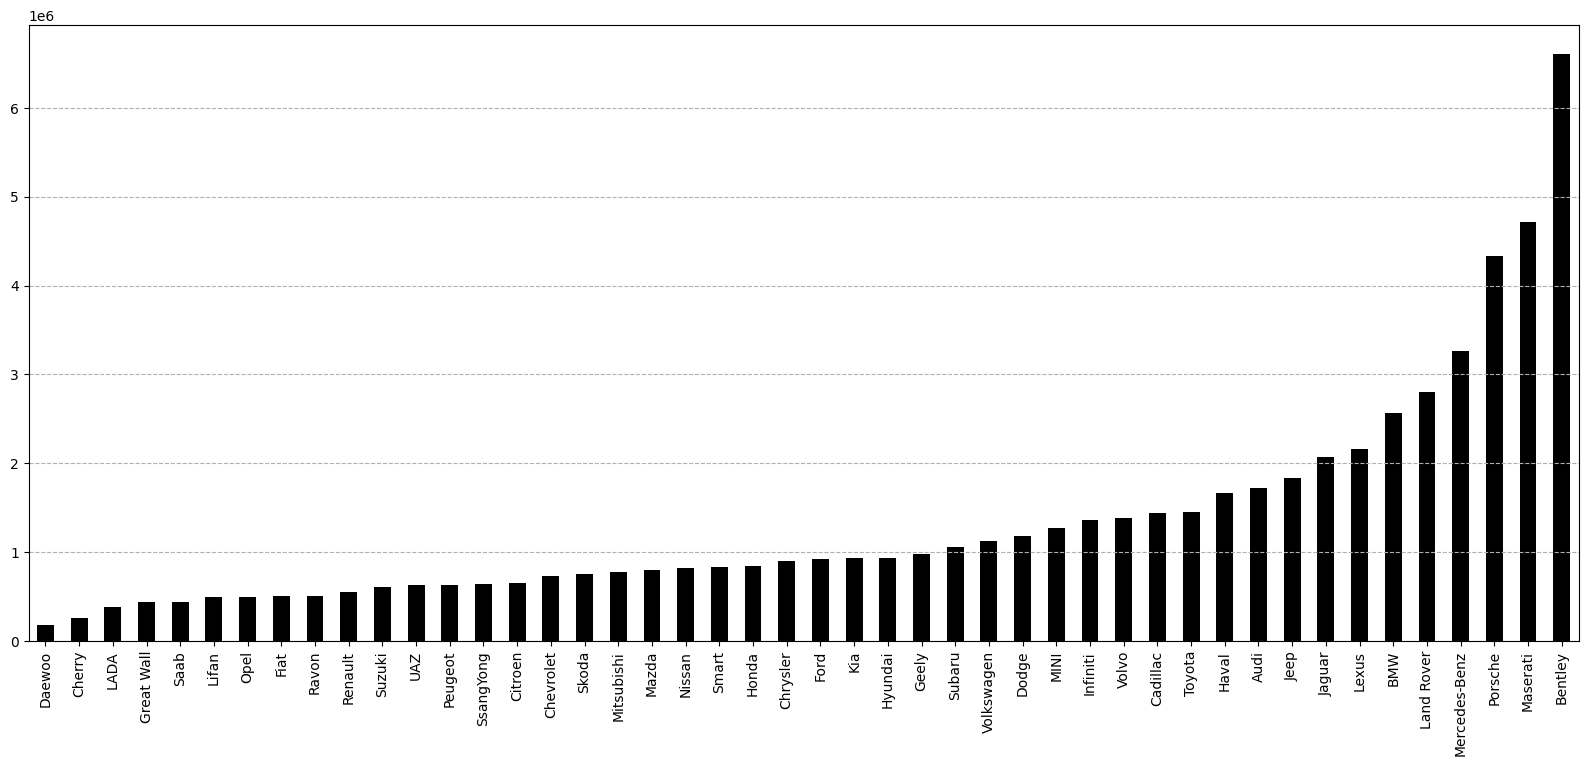

In [133]:
AVG_UPD_DF.loc['Price'].sort_values().plot(kind='bar', color='black', figsize=(20, 8))
plt.grid(True, axis='y', linestyle='--')
plt.show()

Согласно полученной статистике, тройка самых дешевых автомобилей состоит из `Daewoo`, `Cherry` и `LADA`. Список наиболее дорогих автомобилей закрывают `Porsche`, `Maserati` и `Bentley`. При помощи [Chat GPT](https://chatgpt.com) выделим 3 основных ценовых сегмента:

**1. Бюджетный сегмент**

![Emtply wallet](https://avatars.mds.yandex.net/i?id=393db0b8b23ab55700be0db61596659a_l-5207283-images-thumbs&n=13)

- Ценовой диапазон: до 1 млн рублей
- Целевая аудитория: покупатели, ищущие доступный личный транспорт

**2. Средний сегмент**

![T-bank](https://avatars.dzeninfra.ru/get-zen_doc/1821029/pub_627ec6a85003d62f964adf1e_627ecad237af4e736343b1e5/scale_1200)

- Ценовой диапазон: от 1 до 3 млн рублей
- Целевая аудитория: покупатели, которым важны качество, безопасность и более высокий уровень оснащения

**3. Премиальный сегмент**

![Money mount](https://avatars.mds.yandex.net/i?id=08208bb9fe941f65f1abdd63d4ee4414_l-10350336-images-thumbs&n=13)

- Ценовой диапазон: от 3 млн рублей и выше
- Целевая аудитория: обеспеченные клиенты, ценящие комфорт, статус и инновационные технологии

Попробуем создать портрет среднестатистического автомобиля из каждого сегмента. Полученную информацию занесем в датафрейм `AVERAGE_CAR`.

In [147]:
CP_DF['Full name'] = CP_DF['Brand'] + ' ' + CP_DF['Model'] + CP_DF['Body type']

LOWCOST_DF = CP_DF[CP_DF['Price'] <= 1000000]
MIDCOST_DF = CP_DF[CP_DF['Price'] <= 3000000].loc[CP_DF['Price'] > 1000000]
HIGHCOST_DF = CP_DF[CP_DF['Price'] > 3000000]

AVERAGE_CAR = pd.DataFrame({
    'Favourite car': [LOWCOST_DF['Full name'].mode().iloc[0], MIDCOST_DF['Full name'].mode().iloc[0], HIGHCOST_DF['Full name'].mode().iloc[0]],
    'Favourite country': [LOWCOST_DF['Country'].mode().iloc[0], MIDCOST_DF['Country'].mode().iloc[0], HIGHCOST_DF['Country'].mode().iloc[0]],
    'Gearbox': [LOWCOST_DF['Gearbox'].mode().iloc[0], MIDCOST_DF['Gearbox'].mode().iloc[0], HIGHCOST_DF['Gearbox'].mode().iloc[0]],
    'Drive unit': [LOWCOST_DF['Drive unit'].mode().iloc[0], MIDCOST_DF['Drive unit'].mode().iloc[0], HIGHCOST_DF['Drive unit'].mode().iloc[0]],
    'Fuel type': [LOWCOST_DF['Fuel type'].mode().iloc[0], MIDCOST_DF['Fuel type'].mode().iloc[0], HIGHCOST_DF['Fuel type'].mode().iloc[0]],
    'Engine volume': [LOWCOST_DF['Engine volume'].mode().iloc[0], MIDCOST_DF['Engine volume'].mode().iloc[0], HIGHCOST_DF['Engine volume'].mode().iloc[0]],
    'Mileage': [LOWCOST_DF['Mileage'].mean().round(), MIDCOST_DF['Mileage'].mean().round(), HIGHCOST_DF['Mileage'].mean().round()],
    'Price': [LOWCOST_DF['Price'].mean().round(), MIDCOST_DF['Price'].mean().round(), HIGHCOST_DF['Price'].mean().round()],
    'Age': [2020 - LOWCOST_DF['Year'].mean().round(), 2020 - MIDCOST_DF['Year'].mean().round(), 2020 - HIGHCOST_DF['Year'].mean().round()],
    'Max speed':[LOWCOST_DF['Maximum speed'].mean().round(), MIDCOST_DF['Maximum speed'].mean().round(), HIGHCOST_DF['Maximum speed'].mean().round()],
    'Consumption': [LOWCOST_DF['Consumption'].mean().round(), MIDCOST_DF['Consumption'].mean().round(), HIGHCOST_DF['Consumption'].mean().round()],
    'Trunk volume': [(LOWCOST_DF['Trunk volume min'].mean().round()+LOWCOST_DF['Trunk volume min'].mean().round())//2, (MIDCOST_DF['Trunk volume max'].mean().round()+MIDCOST_DF['Trunk volume max'].mean().round())//2, (HIGHCOST_DF['Trunk volume max'].mean().round()+HIGHCOST_DF['Trunk volume max'].mean().round())//2],
}, index=['Average lowcost car', 'Average midcost car', 'Average highcost car']).transpose()


AVERAGE_CAR

,Average lowcost car,Average midcost car,Average highcost car
Favourite car,Opel Astra Hatchback,Kia Sorento SUV,BMW 7 series Sedan
Favourite country,Japan,German,German
Gearbox,automatic,automatic,automatic
Drive unit,front,full,full
Fuel type,petrol,petrol,petrol
Engine volume,1.6,2.0,3.0
Mileage,162137.0,86914.0,28299.0
Price,516965.0,1739222.0,6524943.0
Age,11.0,5.0,2.0
Max speed,190.0,209.0,235.0


По полученному датафрейму можно определить, какие факторы действительно влияют на ценообразование и какие общие предпочтения есть у покупателей.

### Факторы, влияющие на ценообразование

**1. Пробег**

Одним из самых очевидных факторов является пробег автомобиля - пройденный километраж за время эксплуатации. Для наглядности построим график среднего пробега автомобилей каждой марки в разных сегментах.

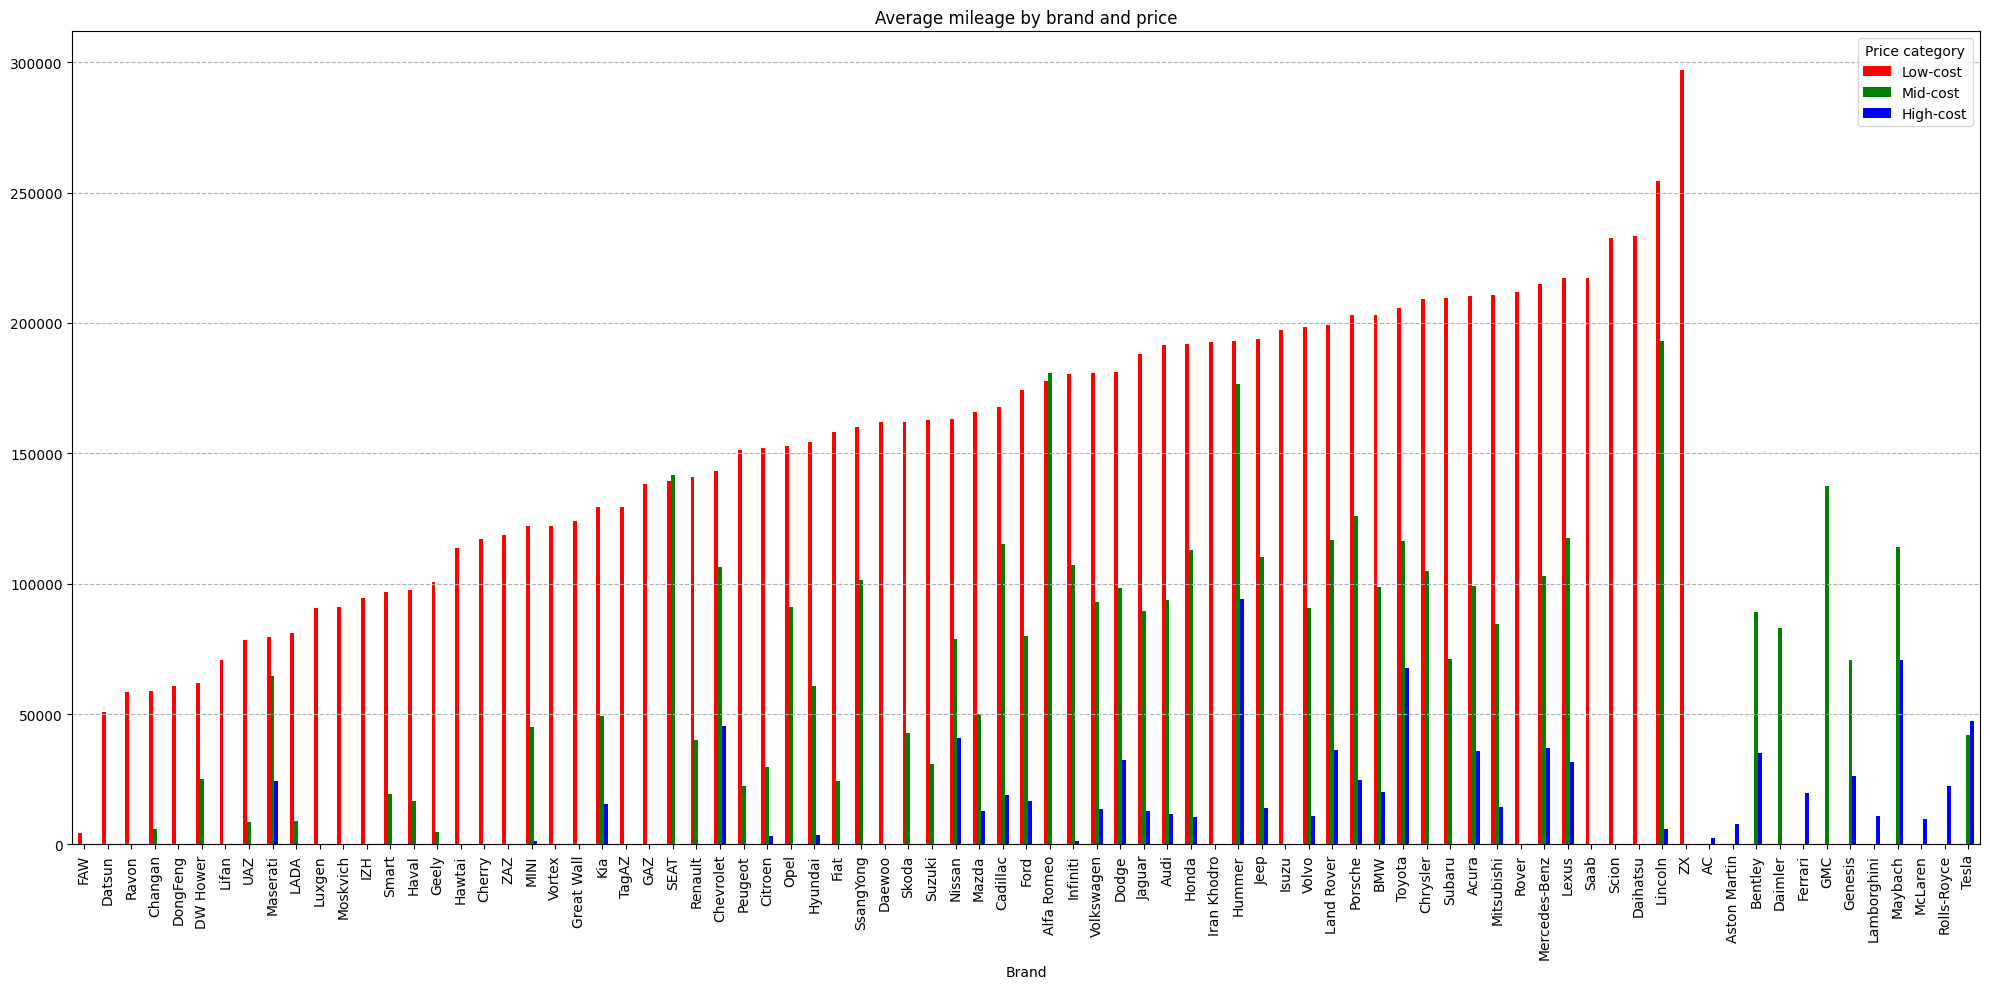

In [135]:
LOWCOST_MILES = LOWCOST_DF.filter(items=['Brand', 'Mileage'], axis=1).groupby('Brand').mean().round(1)
LOWCOST_MILES.rename(columns={'Mileage': 'Low-cost'}, inplace=True)

MIDCOST_MILES = MIDCOST_DF.filter(items=['Brand', 'Mileage'], axis=1).groupby('Brand').mean().round(1)
MIDCOST_MILES.rename(columns={'Mileage': 'Mid-cost'}, inplace=True)

HIGHCOST_MILES = HIGHCOST_DF.filter(items=['Brand', 'Mileage'], axis=1).groupby('Brand').mean().round(1)
HIGHCOST_MILES.rename(columns={'Mileage': 'High-cost'}, inplace=True)

ALL_MILES = (LOWCOST_MILES.join(MIDCOST_MILES, how='outer').join(HIGHCOST_MILES, how='outer'))

ALL_MILES.sort_values('Low-cost').plot(kind='bar', figsize=(20, 10), color=['red', 'green', 'blue'])
plt.title('Average mileage by brand and price')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Price category', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

По графику видно, насколько отличается пробег у автомобилей одних и тех же марок из различных ценовых сегментов. Видна закономерность: чем больше пробег - тем меньше средняя цена на автомобиль.

**2. Привод**

Еще одним фактором, вляющим на цену, является привод. Поскольку автомобили с передним приводом более простые, следовательно более дешевые в производстве, они пользуются высоким спросом в бюджетном сегменте. 

**3. Объем двигателя**

Очередной фактор, упирающийся в стоимость производства. Очевидна закономерность: чем больше объем двигателя - тем выше средняя стоимость автомобиля.

**4. Возраст**

Данный фактор напрямую связан с ранее упомняутым пробегом. Вполне логично, что более новый автомобиль имеет меньший километраж. Однако, чтобы убедиться в зависимости цены от возраста, составим график, показывающий, как меняется стоимость одного и того же автомобиля в зависимости от его возраста. Для примера возьмем автомобиль, производящийся хотя бы с 2000 года по сегодняшний день, например легендарный `ВАЗ 2121`.

![VAZ2121](https://main-cdn.sbermegamarket.ru/big1/hlr-system/-20/949/658/364/221/327/100067761800b0.jpg)

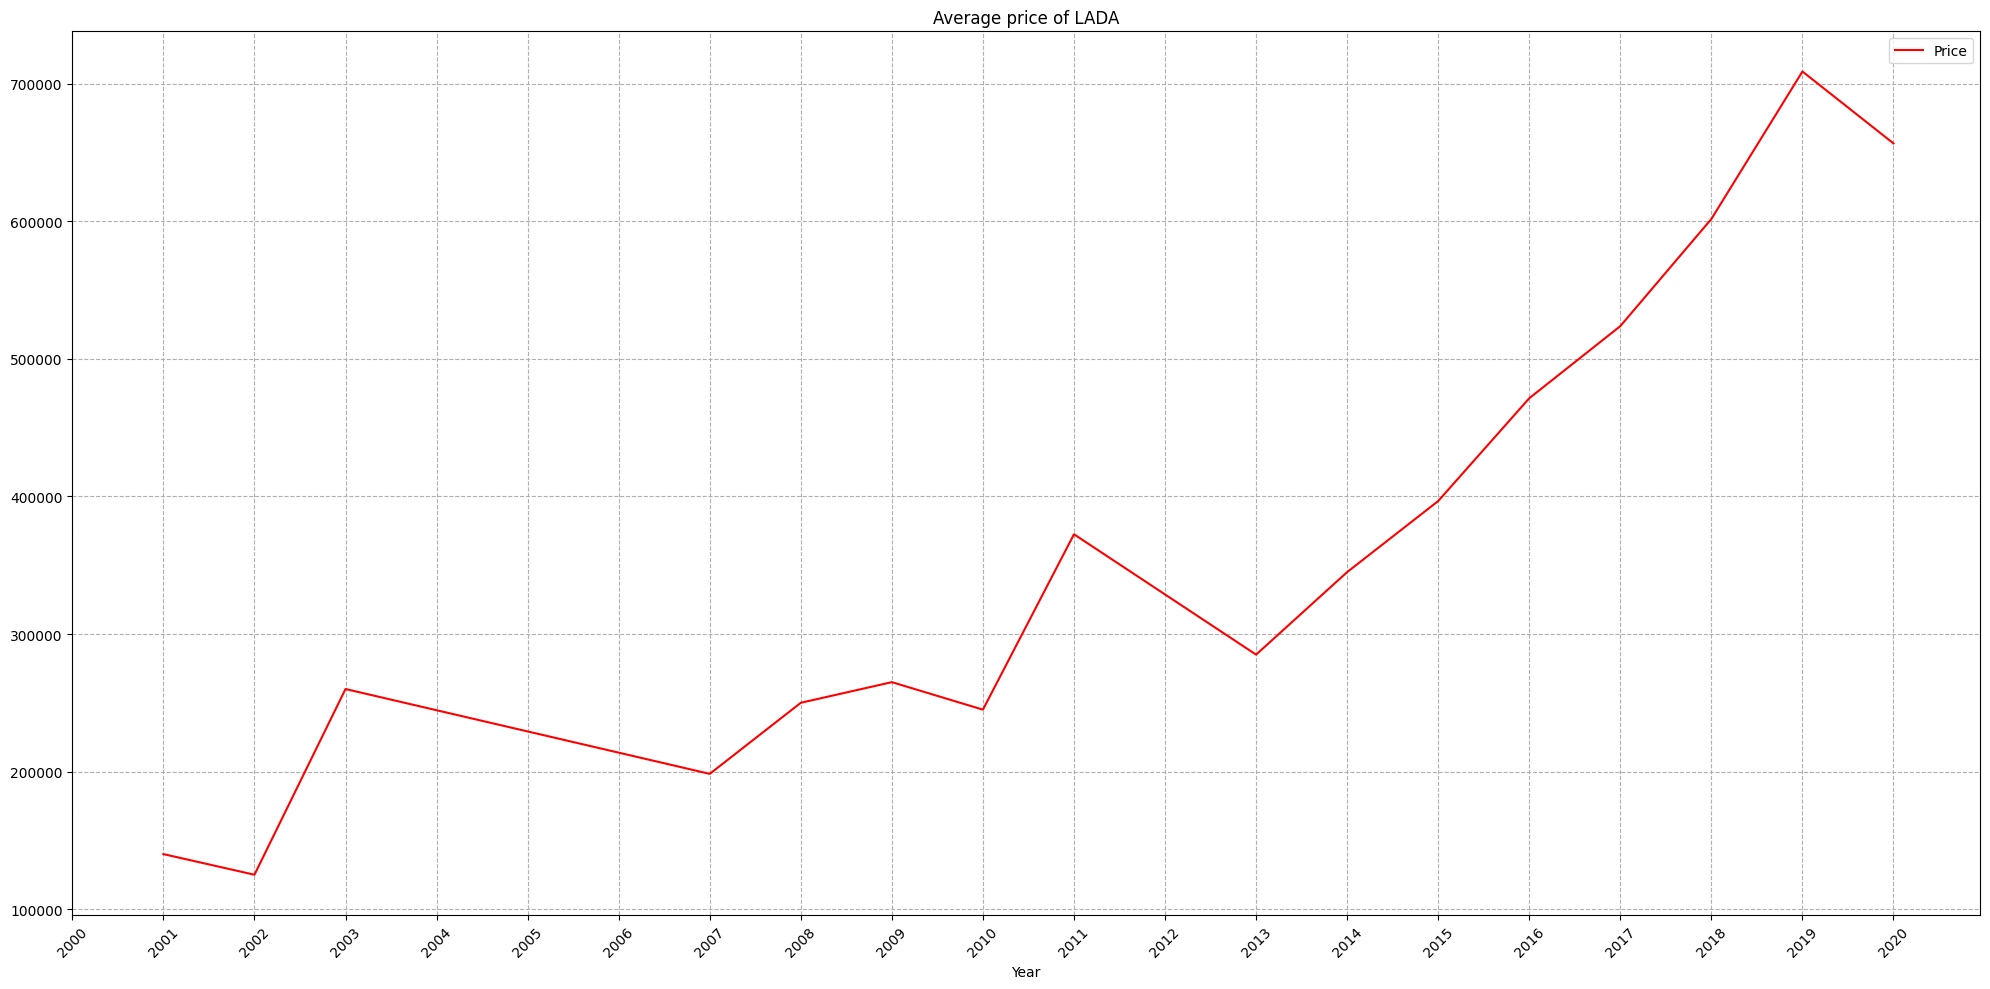

In [136]:
NIVA = CP_DF[CP_DF['Brand'] == 'LADA'].loc[CP_DF['Model']=='2121 (4x4) ']
NIVA_PRICE = NIVA.filter(items=['Year', 'Price']).groupby('Year').mean().round(1)

NIVA_PRICE.plot(color='red', figsize=(20, 10))

plt.title('Average price of LADA')
plt.grid(True, linestyle='--', axis='both')
plt.xticks(range(2000, 2021), rotation=45)
plt.tight_layout()
plt.show()

### Общие предпочтения и интересные замечания

**1. Никто не любит дергать рычаг**

Полученные данные позволяют сделать вывод о том, что автомобили с автоматической коробкой передач пользуются высоким спросом (даже в бюджетном сегменте). На то может быть несколько причин. Согласно [Яндекс Дзену](https://dzen.ru/a/Y0RpjqEU1jBBoLp6), основными причинами являются повсеместное использование, эстетика и удобство.

**2. Никому не нужны электрички**

Довольно очевидный исход, согласно статье на [Дроме](https://www.drom.ru/info/misc/79223.html). В список причин, по которым электромобили не пользуются особым спросом, входят цена, отсутствие льгот, климат и обслуживание.

**3. Меньше денег - больше багажник**

Согласно полученным данным, средний объем багажника автомобилей бюджетного сегмента составляет 853л. Тем временем багажник среднего и премиального сегмента не превышает даже 600л. Одна из статей на [Яндекс Дзене](https://dzen.ru/a/XFNUoWJ3uwCu0nBx) гласит о том, что владельцы крупных автомобилей имеют более практическое мышление, что, по логике, свойственно людям с малым бюджетом.

**4. Все любят немцев**

 Несмотря на то, что средний пробег автомобилей из среднего и премиального сегмента отличается более, чем в 3 раза, покупатели из среднего сегмента также стремятся приобрести немецкий автомобиль. Для большей наглядности составим график, отображающий число автомобилей каждой страны в различных ценовых категориях.


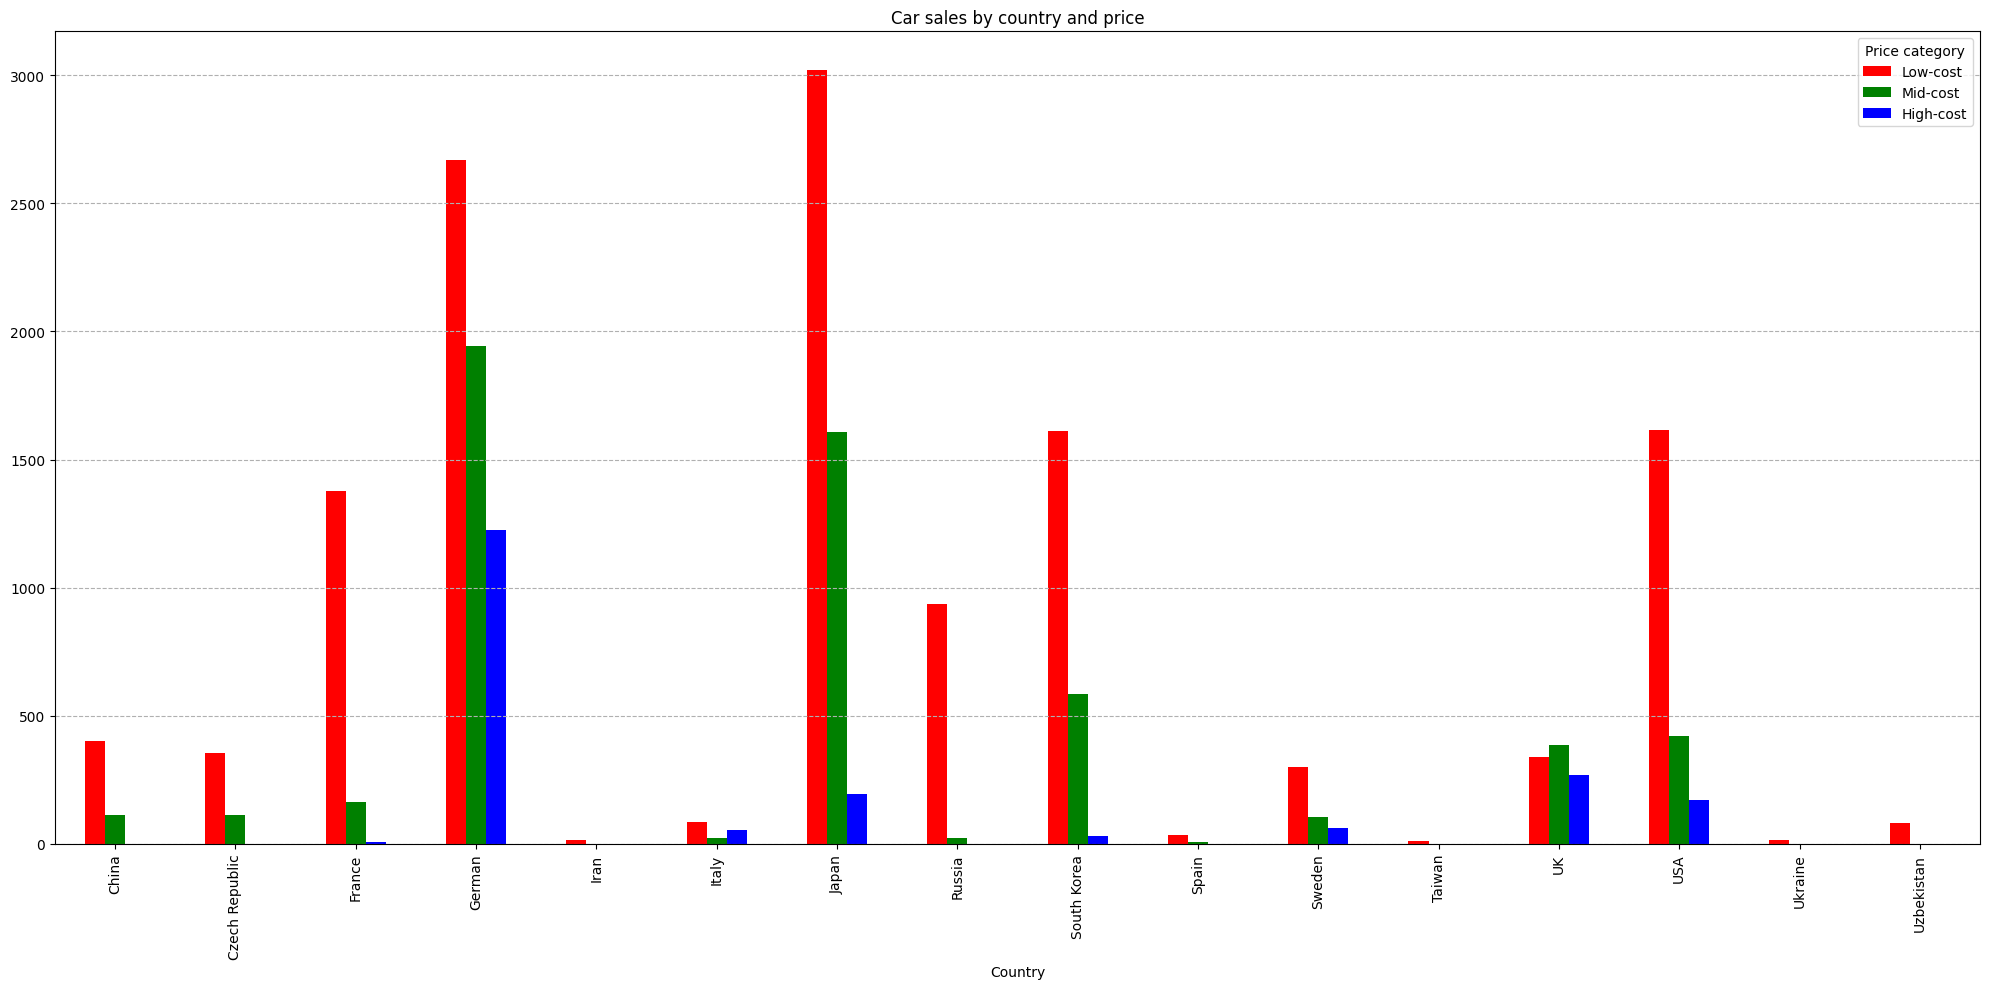

352

In [149]:
LOWCOST_SALES = LOWCOST_DF['Country'].value_counts().rename('Low-cost')
MIDCOST_SALES = MIDCOST_DF['Country'].value_counts().rename('Mid-cost')
HIGHCOST_SALES = HIGHCOST_DF['Country'].value_counts().rename('High-cost')

sales_by_country = (LOWCOST_SALES.to_frame().join(MIDCOST_SALES, how='outer').join(HIGHCOST_SALES, how='outer'))
sales_by_country.plot(kind='bar', figsize=(20, 10), color=['red', 'green', 'blue'])

plt.title('Car sales by country and price')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Price category', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()
len(LOWCOST_DF[LOWCOST_DF['Country']=='Japan'])-len(LOWCOST_DF[LOWCOST_DF['Country']=='German'])

### Рейтинг лучших автомобилей

Для того, чтобы оценить каждый автомобилей, необходимо определить метрику для оценки качества. Для начала нпаишем функцию `normalize` для нормализации данных.

In [138]:
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

#### Амортизация стоимости

Для начала изучим такой параметр, как амортизация стоимости — процесс ухудшения стоимости объекта с течением времени. Рассмотрим, насколько сильно падает цена на каждую модель автомобилей ежегодно, запишем данные в датафрейм `AMORTIZATION`. 

In [143]:
ALL_DF = pd.DataFrame(pd.read_csv('data/cars_dataset.csv'))
ALL_DF = ALL_DF[ALL_DF['Year'] >= 2000]
ALL_DF.index += 1
ALL_DF['Full name'] = ALL_DF['Brand'] + ' ' + ALL_DF['Model'] + ALL_DF['Body type']

AMORTIZATION = ALL_DF.groupby('Full name').apply(
    lambda group: pd.Series({
        'Min year': group['Year'].min(),
        'Min years price': group[group['Year'] == group['Year'].min()]['Price'].mean().round(),
        'Max year': group['Year'].max(),
        'Max years price': group[group['Year'] == group['Year'].max()]['Price'].mean().round(),
        'Amortization': round((group[group['Year'] == group['Year'].max()]['Price'].mean()*0.86*(group['Year'].max()-group['Year'].min()) #Inflation 12%
                              - group[group['Year'] == group['Year'].min()]['Price'].mean())
                              / (group['Year'].max()-group['Year'].min()), 1) 
                              if group['Year'].max() != group['Year'].min() else group['Mileage'].mean()*0.3
    })
).dropna()

AMORTIZATION['Amortization'] = 1 - normalize(AMORTIZATION['Amortization'])

AMORTIZATION.sort_values('Amortization', ascending=False)

,Min year,Min years price,Max year,Max years price,Amortization
Full name,,,,,
Mercedes-Benz GLC AMG SUV,2019.0,7800000.0,2020.0,5333000.0,1.000000
Ferrari 488 Roadster,2016.0,16425000.0,2017.0,17400000.0,0.983886
BMW i8 Coupe,2015.0,5350000.0,2016.0,5446500.0,0.976577
Toyota Altezza Sedan,2001.0,1150000.0,2002.0,660000.0,0.975808
Honda S2000 Convertible,2001.0,1800000.0,2002.0,1466667.0,0.975406
...,...,...,...,...,...
Bentley Bentayga SUV,2016.0,10132833.0,2020.0,22040333.0,0.819470
Mercedes-Benz G-Class AMG SUV,2008.0,2350000.0,2020.0,22162317.0,0.797015
Ferrari GTC4Lusso Hatchback,2016.0,16995000.0,2020.0,27548667.0,0.791688


#### Стоимость содержания

Один из важных параметров. Коэффициент будет складываться из следующих критериев:

1. Является ли поколение актуальным.
2. Стоимость разовой заправки полного бака.
3. Потребление.

Создадим датафрейм `MAINTENANCE` с оценкой содержания.

In [ ]:
fuel_price = {
    'AI-98': 55,
    'AI-95': 50,
    'AI-92': 46,
    'AI-80': 40,
    'AI-76': 38,
    'diesel': 49,
    'GAZ': 26
}

maintenance_weight = {
    'Generation score': 0.6,
    'Refill price': 0.2,
    'Consumption': 0.2
}

MAINTENANCE = ALL_DF.groupby('Full name').apply(
    lambda group: pd.Series({
        'Generation score': int(group['Generation'].mode().str.contains('now').iloc[0]),
        'Refill price': group['Volume fuel tank'].mean()*fuel_price[group['Fuel'].mode().iloc[0]] if group['Fuel'].mode().empty == False else None,
        'Consumption': group['Consumption'].mean() if group['Consumption'].mean() != 0 else None
    })
).dropna()
    
MAINTENANCE['Maintenance'] = normalize(MAINTENANCE['Generation score'])*maintenance_weight['Generation score']+(1 - normalize(MAINTENANCE['Refill price']))*maintenance_weight['Refill price']+(1 - normalize(MAINTENANCE['Consumption']))*maintenance_weight['Consumption']

MAINTENANCE.sort_values('Maintenance', ascending=False)

,Generation score,Refill price,Consumption,Maintenance
Full name,,,,
Fiat 500 Hatchback,1.0,1750.0,2.153846,0.966801
Smart Forfour Hatchback,1.0,1400.0,3.916667,0.959837
Smart Fortwo Convertible,1.0,1400.0,4.360000,0.955332
Honda Vezel SUV,1.0,1840.0,4.000000,0.945227
Nissan NV200 Minivan,1.0,2750.0,1.766667,0.939455
...,...,...,...,...
Maybach 62 Sedan,0.0,5500.0,16.400000,0.104748
Hummer H2 SUV,0.0,5566.0,17.278571,0.093756
Maybach 57 Sedan,0.0,6050.0,16.066667,0.090931


#### Надежность автомобиля

Понятие надежности автомобиля у всех разное. Чтобы судить о надежности автомобилей, используем слудеющие параметры: 

1. Возраст автомобиля - чем старее автомобиль, тем больше вероятность возникновения неисправности. Запчасти для более староно автомобиля зачастую найти труднее. 
2. Клиренс (дорожный просвет) - влияет на проходимость и устойчивость автомобиля. 
3. Снаряженная масса - влияет на износ шин, тормозную систему и двигатель. 
4. Ширина колеи - влияет на стабильность и управляемость автомобиля. 
5. Тип передней подвески - важен для надежности и комфортной эксплуатации.
6. Крутящий момент - мотор с большим крутящим моментом изнашивается быстрее. 
7. Турбонаддув - улучшает производительность двигателя, но может повышать риск износа.
8. Тип привода - оказывает влияние на его проходимость, устойчивость и динамику.
9. Компрессное соотношение -  влияет на мощность двигателя, расход топлива и его износ.
10. Объем топливного бака - влияет на дальность поездки и удобство в дальних поездках. 
11. Тип топлива - влияет на экономичность, надежность и экологичность автомобиля. 
12. Пробег - влияет на степень износа деталей. 
13. Коробка передач - влияет на надежность, экономичность и удобство управления автомобилем.
14. Максимальная скорость - влияет на износ двигателя при высоких оборотах, а также на безопасность. 
15. Страна производитель - оценка будет зависеть от репутации и качества автомобилей, производимых в этих странах.
16. Класс автомобиля - влияет на качество материалов, комфорт и престиж. 

Создадим датафрейм `RELIABILITY` с оценкой надежности.

In [ ]:
reliability_weight = {
    'Year score': 0.08,          
    'Mileage score': 0.14,       
    'Torque score': 0.1,
    'Fuel tank score': 0.03,   
    'Gearbox score': 0.11,       
    'Maximum speed score': 0.01, 
    'Clearance score': 0.03,     
    'Curb weight score': 0.02,   
    'Track width score': 0.02,   
    'Car class score': 0.06,     
    'Country score': 0.06,       
    'Fuel type score': 0.02,     
    'Drive score': 0.09,         
    'Compression score': 0.08,   
    'Boost type score': 0.07,    
    'Suspension score': 0.08 
}

RELIABILITY = ALL_DF.groupby('Full name').apply(
    lambda group: pd.Series({
        
        'Year score': (group['Year'].max()-2020)/4,

        'Clearance score': 1 if group['Clearance'].mean() < 150 else 
                           2 if group['Clearance'].mean() < 180 else 
                           3 if group['Clearance'].mean() < 220 else 4,

        'Curb weight score': 4 if group['Curb weight kg'].mean() < 1000 else
                             3 if group['Curb weight kg'].mean() < 1500 else
                             2 if group['Curb weight kg'].mean() < 2000 else 1,

        'Track width score': 1 if group['Front track width'].mean() < 1500 else
                             2 if group['Front track width'].mean() < 1600 else
                             3 if group['Front track width'].mean() < 1700 else 4,

        'Suspension score': 5 if (group['Front suspension type'].mode().empty == False and group['Front suspension type'].mode().iloc[0] == 'independent, hydropneumatic element') else 
                            4 if (group['Front suspension type'].mode().empty == False and group['Front suspension type'].mode().iloc[0] == 'independent, pneumatic element') else 
                            4 if (group['Front suspension type'].mode().empty == False and group['Front suspension type'].mode().iloc[0] == 'independent, spring-loaded') else 
                            3 if (group['Front suspension type'].mode().empty == False and group['Front suspension type'].mode().iloc[0] == 'independent, torsion bar') else 
                            3 if (group['Front suspension type'].mode().empty == False and group['Front suspension type'].mode().iloc[0] == 'independent, spring') else 
                            2 if (group['Front suspension type'].mode().empty == False and group['Front suspension type'].mode().iloc[0] == 'dependent, spring') else 1,
                       
        'Torque score': 5 if group['Torque'].max() < 100 else
                        4.5 if group['Torque'].max() < 150 else
                        4 if group['Torque'].max() < 200 else
                        3.5 if group['Torque'].max() < 250 else
                        3 if group['Torque'].max() < 300 else
                        2.5 if group['Torque'].max() < 350 else
                        2 if group['Torque'].max() < 400 else
                        1.5 if group['Torque'].max() < 450 else 1,

        'Boost type score': 2 if (group['Boost type'].mode().empty == False and group['Boost type'].mode().iloc[0] == 'turbocharging') else 
                            1 if (group['Boost type'].mode().empty == False and group['Boost type'].mode().iloc[0] == 'compressor') else 0,
                            
        'Drive score': 5 if (group['Drive'].mode().empty == False and group['Drive'].mode().iloc[0] == 'full') else 
                       4 if (group['Drive'].mode().empty == False and group['Drive'].mode().iloc[0] == 'front') else 3,
                           
        'Compression score': 1 if group['Compression ratio'].mean() < 9 else
                             2 if group['Compression ratio'].mean() < 10 else
                             3 if group['Compression ratio'].mean() < 12 else 4,

        'Fuel tank score': 2 if group['Volume fuel tank'].mean() < 40 else
                           3 if group['Volume fuel tank'].mean() < 50 else
                           4 if group['Volume fuel tank'].mean() < 70 else 5,

        'Fuel type score': 5 if group['Fuel type'].mode().iloc[0] == 'petrol' else
                           4 if group['Fuel type'].mode().iloc[0] == 'hybrid' else
                           3 if group['Fuel type'].mode().iloc[0] == 'diesel' else
                           2 if group['Fuel type'].mode().iloc[0] == 'SYG' else 1,
              
        'Mileage score': 5 if group['Mileage'].mean().round() < 10000 else
                         4 if group['Mileage'].mean().round() < 50000 else
                         3 if group['Mileage'].mean().round() < 100000 else
                         2 if group['Mileage'].mean().round() < 150000 else 1,
        
        'Gearbox score': 5 if group['Gearbox'].mode().iloc[0] == 'mechanics' else 
                        4 if group['Gearbox'].mode().iloc[0] == 'automatic' else 
                        3 if group['Gearbox'].mode().iloc[0] == 'robot' else 2,

        'Maximum speed score': 1 if group['Maximum speed'].max() < 120 else
                               2 if group['Maximum speed'].max() < 150 else
                               3 if group['Maximum speed'].max() < 180 else
                               4 if group['Maximum speed'].max() < 210 else 5,

        'Car class score': 5 if (group['Car class'].mode().empty == False and group['Car class'].mode().iloc[0] == 'S') else 
                           5 if (group['Car class'].mode().empty == False and group['Car class'].mode().iloc[0] == 'F') else 
                           4 if (group['Car class'].mode().empty == False and group['Car class'].mode().iloc[0] == 'E') else 
                           3 if (group['Car class'].mode().empty == False and group['Car class'].mode().iloc[0] == 'J') else 
                           3 if (group['Car class'].mode().empty == False and group['Car class'].mode().iloc[0] == 'D') else 
                           3 if (group['Car class'].mode().empty == False and group['Car class'].mode().iloc[0] == 'C') else 
                           2 if (group['Car class'].mode().empty == False and group['Car class'].mode().iloc[0] == 'M') else 
                           2 if (group['Car class'].mode().empty == False and group['Car class'].mode().iloc[0] == 'B') else 
                           1 if (group['Car class'].mode().empty == False and group['Car class'].mode().iloc[0] == 'A') else 0,
                           
        'Country score': 5 if group['Country'].mode().iloc[0] == 'Japan' else
                         5 if group['Country'].mode().iloc[0] == 'German' else
                         4 if group['Country'].mode().iloc[0] == 'Sweden' else
                         3 if group['Country'].mode().iloc[0] == 'UK' else
                         4 if group['Country'].mode().iloc[0] == 'South Korea' else
                         2 if group['Country'].mode().iloc[0] == 'USA' else
                         3 if group['Country'].mode().iloc[0] == 'Czech Republic' else
                         2 if group['Country'].mode().iloc[0] == 'Italy' else
                         2 if group['Country'].mode().iloc[0] == 'France' else 1
    })
).dropna()

for i in RELIABILITY:
    RELIABILITY[i] = round(normalize(RELIABILITY[i]))
RELIABILITY['Reliability'] = sum(RELIABILITY[i] * reliability_weight[i] for i in RELIABILITY)

RELIABILITY.sort_values('Reliability', ascending=False)

,Year score,Clearance score,Curb weight score,Track width score,Suspension score,Torque score,Boost type score,Drive score,Compression score,Fuel tank score,Fuel type score,Mileage score,Gearbox score,Maximum speed score,Car class score,Country score,Reliability
Full name,,,,,,,,,,,,,,,,,
BMW X7 SUV,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.86
Mercedes-Benz GLC AMG SUV,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.85
Mercedes-Benz S-Class Coupe,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.85
Audi SQ7 SUV,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.83
Porsche Cayenne Coupe SUV,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nissan Liberty Compact MPV,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.24
Chevrolet Spark Hatchback,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.23
Peugeot 1007 Hatchback,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.22


## Рейтинг

Объединим все предыдущие параметры и составим итоговый рейтинг. Исключим автомобили, продажи которых сосавили менее 50 экземпляров.


In [ ]:
TOTAL = pd.DataFrame()

TOTAL = ALL_DF.groupby('Full name').apply(
    lambda group: pd.Series({
        'Price': group['Price'].mean().round() if len(group) >= 50 else None
    })
).dropna()
TOTAL['Maintenance'] = MAINTENANCE['Maintenance']
TOTAL['Amortization'] = AMORTIZATION['Amortization']
TOTAL['Reliability'] = RELIABILITY['Reliability']
TOTAL.fillna(0, inplace=True)

TOTAL['Score'] = sum(TOTAL[i] if i != 'Price' else 0 for i in TOTAL)*38.8
TOTAL = TOTAL.sort_values('Score', ascending=False)
TOTAL

,Price,Maintenance,Amortization,Reliability,Score
Full name,,,,,
LADA 2121 (4x4) SUV,521368.0,0.870582,0.965329,0.74,99.945356
Toyota Corolla Sedan,721170.0,0.892087,0.958530,0.57,93.919948
Toyota Camry Sedan,1260192.0,0.858411,0.952473,0.45,87.722299
Renault Logan Sedan,568589.0,0.891180,0.964500,0.37,86.356408
Mazda CX-5 SUV,1752766.0,0.285866,0.957104,0.73,76.551220
...,...,...,...,...,...
Ford Fiesta Hatchback,328536.0,0.313173,0.965324,0.31,61.633680
Ford Focus Station Wagon,536932.0,0.300526,0.963591,0.30,60.687732
Dodge Caliber Hatchback,512043.0,0.279221,0.966326,0.30,59.967228


Разделим полученные данные по ценовым категориям. Выведем топ 3 из каждой.

In [ ]:
TOP3_LOW = TOTAL[TOTAL['Price'] <= 1000000].filter(items=['Price', 'Score']).head(3)
TOP3_LOW

,Price,Score
Full name,,
LADA 2121 (4x4) SUV,521368.0,99.945356
Toyota Corolla Sedan,721170.0,93.919948
Renault Logan Sedan,568589.0,86.356408


In [ ]:
TOP3_MID = TOTAL[TOTAL['Price'] > 1000000].loc[TOTAL['Price'] <= 3000000].filter(items=['Price', 'Score']).head(3)
TOP3_MID

,Price,Score
Full name,,
Toyota Camry Sedan,1260192.0,87.722299
Mazda CX-5 SUV,1752766.0,76.551220
Honda CR-V SUV,1129310.0,73.665473


In [ ]:
TOP3_HIGH = TOTAL[TOTAL['Price'] > 3000000].filter(items=['Price', 'Score']).head(3)
TOP3_HIGH

,Price,Score
Full name,,
BMW X6 SUV,3400943.0,69.147894
Land Rover Range Rover SUV,3980291.0,69.028791
Mercedes-Benz G-Class SUV,5341176.0,64.704795


## Вывод по проделанной работе

### Результат

Был проведен анализ цен на автомобили на российском рынке в 2020 году, в результате которого все автомобили были разделены на 3 основных ценовых сегмента. 
Был составлен портрет среднестатистического автомобиля из каждого ценового сегмента. 
Были выявлены основные факторы, влияющие на ценообразование.
Были выявлены общие предпочтения покупателей в 2020 году.
Был составлен рейтинг лучших автомобилей в каждом ценовом сегменте.

### Вывод

На практике были освоены навыки работы с библиотеками из языка программирования Python для анализа данных. Лада Нива - лучший автомобиль всех времен.